Converting all the Text Files  in folder into csv File.

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/txt to csv/Training Data'
output = 'output.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

In [ ]:
import os
import csv

dirpath = '/content/drive/MyDrive/txt to csv/Testing data '
output = 'Test.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['FileName', 'Content'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

In [ ]:
import csv
csv_file ='Test.csv'
txt_file = input('Enter the name of your output file: ')
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

Enter the name of your output file: test.txt


In [ ]:
import csv
csv_file ='output.csv'
txt_file = input('Enter the name of your output file: ')
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

Enter the name of your output file: train.txt


In [ ]:
### Data Pre-prcessing


In [ ]:
import pandas as pd
df = pd.read_csv("/content/output.csv")
df.head()

,FileName,Content,spam/ham
0,3-1msg1.txt,Subject: re : 2 . 882 s - > np np\n\n> deat : ...,1.0
1,3-1msg2.txt,Subject: s - > np + np\n\ndiscussion s - > np ...,0.0
2,3-1msg3.txt,Subject: 2 . 882 s - > np np\n\n. . . 's much ...,0.0
3,3-375msg1.txt,"Subject: gent conference\n\n"" listserv "" inter...",1.0
4,3-378msg2.txt,Subject: l2 learn / cultural empathy\n\ngradua...,1.0


In [ ]:
df['spam/ham'].value_counts()

1.0    156
0.0    133
Name: spam/ham, dtype: int64

Read and Formating Trainig Dataset

In [1]:
import pandas as pd
data = open('train.txt').read()
labels, text = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split(' ')
    labels.append(content[0])
    text.append(" ".join(content[1:]))

Read and Formating Testing Dataset

In [2]:
testing_data = open('test.txt').read()
test_labels, test_text = [], []
for i, line in enumerate(testing_data.split("\n")):
    content = line.split(' ')
    test_labels.append(content[0])
    test_text.append(" ".join(content[1:]))


Creating Dataframe


In [3]:
df = pd.DataFrame (list(zip(text, labels)) , columns = ['Raw Text', 'Labels'])
test_df = pd.DataFrame (list(zip(test_text, test_labels)) , columns = ['Raw Text', 'Labels'])
test_df = test_df.dropna()

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

Data Cleaning

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')
df['Lower Case'] = df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tokenization'] = df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
df['After Lemmatization'] = df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Raw Text,Labels,Lower Case,Removal of Punctuation,Removal of Special Characters,Stopwords Removal,Tokenization,After Lemmatization
0,Content,FileName,content,content,content,content,[content],content
1,Subject: re : 2 . 882 s - > np np,3-1msg1.txt,subject: re : 2 . 882 s - > np np,subject re 2 882 s np np,subject re 2 882 s np np,subject 2 882 np np,"[subject, 2, 882, np, np]",subject 2 882 np np
2,,,,,,,[],
3,"deat : sun , 15 dec 91 2 : 25 : 2 est > : mich...",>,"deat : sun , 15 dec 91 2 : 25 : 2 est > : mich...",deat sun 15 dec 91 2 25 2 est michael m...,deat sun 15 dec 91 2 25 2 est michael m...,deat sun 15 dec 91 2 25 2 est michael mmorse v...,"[deat, sun, 15, dec, 91, 2, 25, 2, est, michae...",deat sun 15 dec 91 2 25 2 est michael mmorse v...
4,,,,,,,[],
...,...,...,...,...,...,...,...,...
1153,"Subject: "" life without debt """,spmsga114.txt,"subject: "" life without debt """,subject life without debt,subject life without debt,subject life without debt,"[subject, life, without, debt]",subject life without debt
1154,,,,,,,[],
1155,"intrusion . offence mean . interest , simply i...",pardon,"intrusion . offence mean . interest , simply i...",intrusion offence mean interest simply igno...,intrusion offence mean interest simply igno...,intrusion offence mean interest simply ignore ...,"[intrusion, offence, mean, interest, simply, i...",intrusion offence mean interest simply ignore ...
1156,,,,,,,[],


In [6]:
test_df['Lower Case'] = test_df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['Removal of Punctuation'] = test_df['Lower Case'].str.replace('[^\w\s]','')
test_df['Removal of Special Characters'] = test_df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
test_df['Stopwords Removal'] = test_df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test_df['Tokenization'] = test_df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
test_df['After Lemmatization'] = test_df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

Data Transformation

In [7]:

from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(df['After Lemmatization'])
x_tfidf =  tfidf_vect.transform(df['After Lemmatization'])

In [8]:
vect_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vect.vocabulary_)
vect_test.fit(test_df['After Lemmatization'])
xtest = vect_test.transform(test_df['After Lemmatization'])
test_y = test_df['Labels']

In [9]:
def separate_by_class(df):
	separated = dict()
	for i in range(len(df)):
		vector = df[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

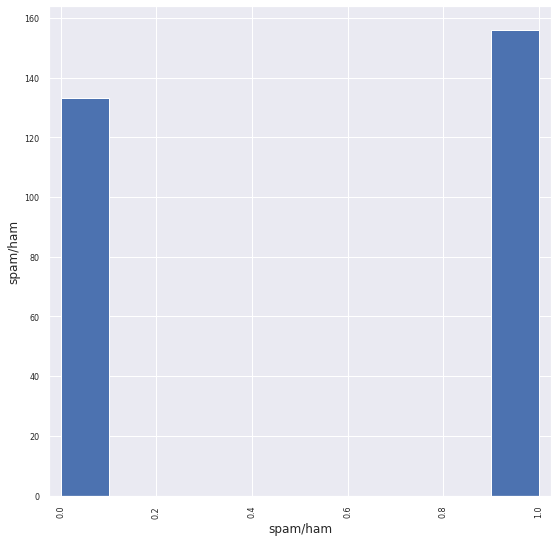

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix (df, alpha=0.8, figsize=(9,9))
plt.show()

In [10]:
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

Classifying Naive bayes

In [ ]:
import numpy as np
class NaiveBayes():

  def _init_(self, X, y):
    self.num_examples, self.num_features = X.shape
    self.num_classes =  len(np.unique(y))
    self.eps = le-6
  def fit(self,X , y):
    self.classes_mean ={}
    self.classes_variance ={}
    self.classes_prior ={}

    for c in range(self.num_classes):
      x_c = X[y == c]

      self.classes_mean[str(c)] = np.mean(x_c,axis =0)
      self.classes_variance[str(c)] = np.var(x_c,axis =0)
      self.classes_prior[str(c)] = x_c.shape[0]/self.num_examples

  def predict(self,x):
    probs = np.zeros((self.num_examples, self.num_classes))

    for c in range(self.num_classes):
      prior = self.classes_prior[str(c)]
      probs_c =  self.density_function(X, self.classes_mean[str(c)], self.classes_variance[str(c)])
      probs[:, c] = probs_c + np.log(prior)
      return np.argmax [probs, 1]
  def density_function(self, x, mean, sigma):
    const = -self.num_features/2*np.log(2*np.pi)-0.5*np.sum(np.log(sigma+self.eps))
    probs = 0.5*np.sum(np.power(X-mean,2))/((sigma+self.eps), 1)
    return const-probs

if __name__ =='_main_':
  X = np.loadtxt('/content/train.txt', delimiter=',')
  y = np.loadtxt('/content/test.txt')-1
  print(X.shape)
  print(y.shape)
  NB = NaiveBayes(X,y)
  NB.fit( X,y)
  y_predict = NB.predict(X)




In [11]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm

In [12]:

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, df['Labels'].values,test_size=0.2)

Training And Evaluating Models


---



In [13]:
from sklearn import metrics
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val


Navie Bayes - Validation Metrics

In [22]:
naive_bayes_model = naive_bayes.MultinomialNB()
d=naive_bayes_model.fit(train_x, train_y)

naive_bayes_predictions_validation_data = naive_bayes_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.5043103448275862
Precision is 0.5043103448275862
Recall is 0.5043103448275862
F1 is 0.5043103448275862


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [16]:
nb_scores_mean = cross_validation_score(naive_bayes_model, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_scores_mean))

Navie Bayes Cross Validation Score is 0.5054347826086956


In [17]:
naive_bayes_predictions_test_data = naive_bayes_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.5
Precision is 0.5
Recall is 0.5
F1 is 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [18]:
nb_test_scores_mean = cross_validation_score(naive_bayes_model, xtest, test_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_test_scores_mean))

Navie Bayes Cross Validation Score is 0.49994842322428534


Confusion Matrix

Confusion matrix, without normalization
[[462   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
Normalized confusion matrix
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


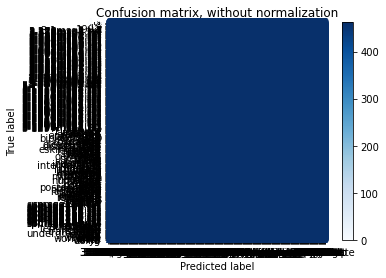

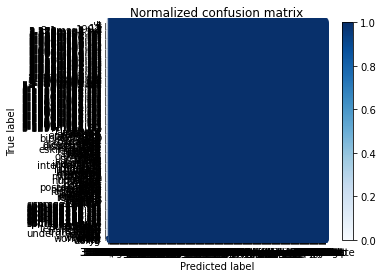

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(d,train_x, train_y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()